<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Prova_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTÃO 3**

Esta questão aborda a aplicação prática de um problema de ANOVA (Análise de Variância) utilizando dados reais empregados em contextos empresariais. O objetivo é analisar as médias de quantidades e preços de produtos agrupados por países, utilizando o conjunto de dados Vendas de Varejo Online. Siga os passos abaixo para desenvolver sua solução

In [30]:
# Importar bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/online-retail-ii-data-set-from-ml-repository")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/online-retail-ii-data-set-from-ml-repository


In [32]:
# Ler base em xlsx
import glob
xlsx_files = glob.glob(path + '/*.xlsx')

if xlsx_files:
    # Assuming there's only one xlsx file or the first one is the correct one
    df = pd.read_excel(xlsx_files[0])
    print(f"Successfully loaded data from: {xlsx_files[0]}")
else:
    print("No .xlsx files found in the directory.")

Successfully loaded data from: /kaggle/input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx


In [33]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [35]:
# Verificando dados ausentes

df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [36]:
# Removendo registros inválidos

df = df.dropna(subset=['Customer ID', 'Description'])

# Filtrando apenas países com pelo menos 500 transações

country_counts = df['Country'].value_counts()
top_countries = country_counts[country_counts >= 500].index
df = df[df['Country'].isin(top_countries)]

In [37]:
# Estatísticas descritivas por país

df_grouped = df.groupby('Country')[['Quantity', 'Price']].mean().sort_values(by='Quantity', ascending=False)
df_grouped.head()

,Quantity,Price
Country,,
Netherlands,65.663778,3.311910
Sweden,59.003398,7.689287
Australia,30.662080,6.202324
EIRE,20.326521,8.200480
Switzerland,18.578770,4.411281


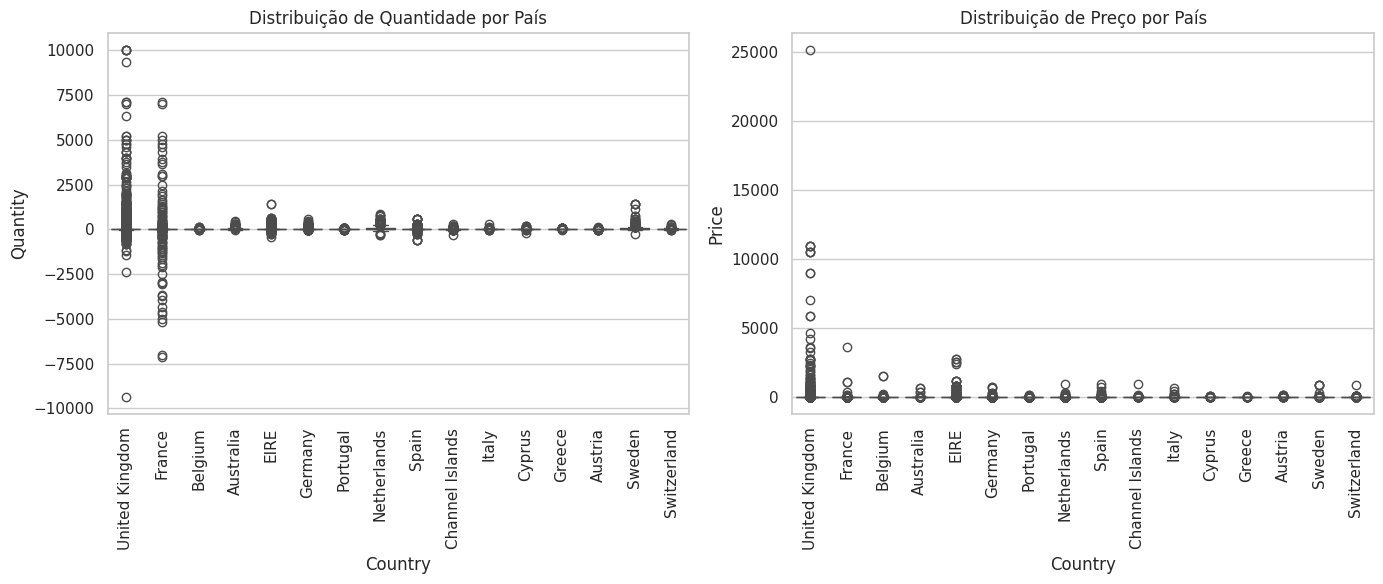

In [38]:
# Boxplots para visualização
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Country', y='Quantity', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição de Quantidade por País')

plt.subplot(1, 2, 2)
sns.boxplot(x='Country', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição de Preço por País')

plt.tight_layout()
plt.show()

In [39]:
# ANOVA com todos os países
model_all = ols('Quantity ~ C(Country)', data=df).fit()
anova_table = sm.stats.anova_lm(model_all, typ=2)
print(anova_table)

                  sum_sq        df           F  PR(>F)
C(Country)  1.093949e+07      15.0  119.353329     0.0
Residual    2.530021e+09  414050.0         NaN     NaN


3.b

In [40]:
from scipy.stats import f_oneway

# Seleção de amostras para 3 países representativos
uk = df[df['Country'] == 'United Kingdom']['Quantity']
germany = df[df['Country'] == 'Germany']['Quantity']
france = df[df['Country'] == 'France']['Quantity']

In [41]:
# ANOVA: Quantidade
f_q, p_q = f_oneway(uk, germany, france)
print(f"ANOVA Quantidade - F: {f_q:.2f}, p-valor: {p_q:.4f}")

ANOVA Quantidade - F: 2.76, p-valor: 0.0630


In [42]:
# ANOVA: Preço
uk_p = df[df['Country'] == 'United Kingdom']['Price']
germany_p = df[df['Country'] == 'Germany']['Price']
france_p = df[df['Country'] == 'France']['Price']

In [43]:
f_p, p_p = f_oneway(uk_p, germany_p, france_p)
print(f"ANOVA Preço Unitário - F: {f_p:.2f}, p-valor: {p_p:.4f}")

ANOVA Preço Unitário - F: 0.19, p-valor: 0.8258


3.c

In [44]:
# Testando normalidade dos resíduos
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [45]:
# Modelo de ANOVA para quantidade
model_q = ols('Quantity ~ C(Country)', data=df).fit()
resid_q = model_q.resid

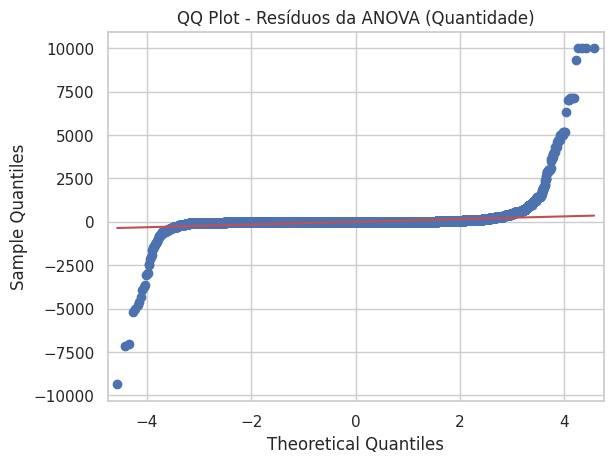

In [46]:
# QQ plot
sm.qqplot(resid_q, line='s')
plt.title("QQ Plot - Resíduos da ANOVA (Quantidade)")
plt.show()

In [47]:
# Teste de homocedasticidade (variâncias iguais)
from statsmodels.stats.diagnostic import het_breuschpagan
_, pval_bpg, _, _ = het_breuschpagan(resid_q, model_q.model.exog)
print(f"Teste de Breusch-Pagan (homocedasticidade): p-valor = {pval_bpg:.4f}")

Teste de Breusch-Pagan (homocedasticidade): p-valor = 0.0000


**Ajuste: Log-transformação**

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


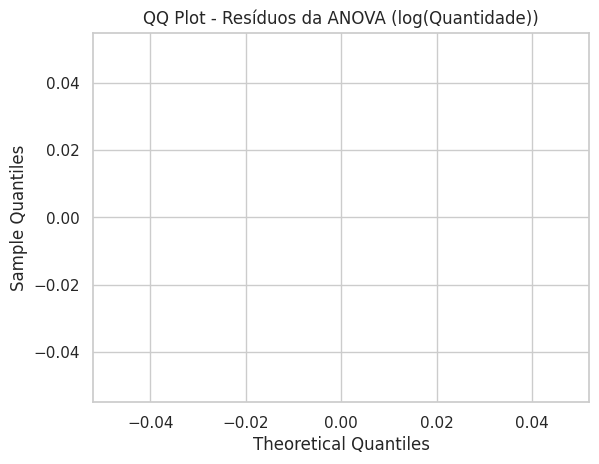

In [48]:
# Aplicando log para corrigir assimetria
df['log_quantity'] = np.log1p(df['Quantity'])

# Novo modelo com log da quantidade
model_log_q = ols('log_quantity ~ C(Country)', data=df).fit()
sm.qqplot(model_log_q.resid, line='s')
plt.title("QQ Plot - Resíduos da ANOVA (log(Quantidade))")
plt.show()

In [49]:
# Filtra apenas linhas com quantidade positiva
df_log = df[df['Quantity'] > 0].copy()

# Aplica log1p apenas nos dados válidos
df_log['log_quantity'] = np.log1p(df_log['Quantity'])

In [50]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Modelo ANOVA com a variável transformada
model_log_q = ols('log_quantity ~ C(Country)', data=df_log).fit()


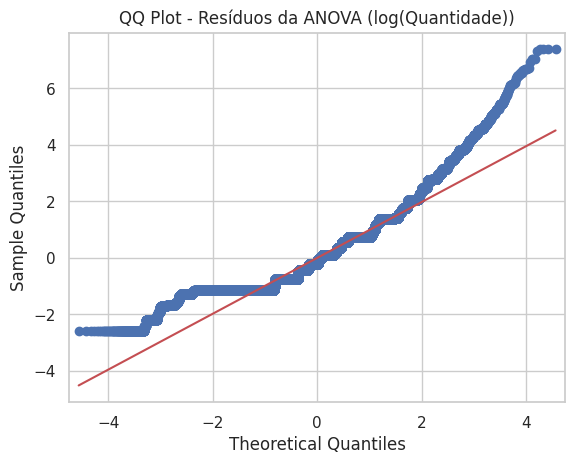

In [51]:
# QQ plot dos resíduos
sm.qqplot(model_log_q.resid, line='s')
plt.title("QQ Plot - Resíduos da ANOVA (log(Quantidade))")
plt.show()

**3.d) Interpretação e Tomada de Decisão**

